In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
subspecies = pd.read_csv("Data/mgSs.coverage.stats.csv").rename(columns={"Unnamed: 0" : "subspecies"})
subspecies = subspecies['subspecies']
taxaKey = pd.read_csv("/Users/amaros/Desktop/mgss2/VIRGO2_taxaKey_all_gardnerella.csv")

def lighter_colors(base_color, num_colors):
    # Convert the base color to its RGB components
    r = int(base_color[1:3], 16)
    g = int(base_color[3:5], 16)
    b = int(base_color[5:7], 16)

    # Calculate the step values for degrading
    r_step = (255 - r) / num_colors
    g_step = (255 - g) / num_colors
    b_step = (255 - b) / num_colors

    # Generate the progressively lighter colors
    lighter_colors = []
    for i in range(num_colors):
        new_r = int(r + i * r_step)
        new_g = int(g + i * g_step)
        new_b = int(b + i * b_step)
        lighter_colors.append(f'#{new_r:02X}{new_g:02X}{new_b:02X}')

    return lighter_colors

species = subspecies.apply(lambda x : x.split(".")[0])
couleur = []
for i,j in zip(list(species.value_counts().sort_index().index), species.value_counts().sort_index()) :
    if i in taxaKey['Taxa'].values:
        a = taxaKey[taxaKey['Taxa'] == i]['Color'].values[0]
        couleur.append(lighter_colors(a,j))
    else :
        couleur.append(['#8c8c8c']*j)

# Original list with single elements and sublists
original_list = couleur
# Create a new list with only the single elements
new_list = [item for sublist in original_list for item in (sublist if isinstance(sublist, list) else [sublist])]

# subspecies_with_colors = pd.DataFrame({"Subspecies" : subspecies, "Color" : new_list})
# subspecies_with_colors.to_csv("Data/subspecies_with_colors.csv", index=False)
# subspecies_with_colors.head()

,Subspecies,Color
0,Actinotignum_sanguinis.1,#8c8c8c
1,Actinotignum_sanguinis.2,#8c8c8c
2,Aerococcus_christensenii.1,#616161
3,Aerococcus_christensenii.2,#7B7B7B
4,Aerococcus_christensenii.3,#959595


In [9]:
# Variation of colors between 2 kind of blues for Gardnerella : this generate 58 variation of blues

def interpolate_color(color1, color2, num_steps):
    # Convert hex colors to RGB tuples
    color1 = tuple(int(color1[i:i+2], 16) for i in (1, 3, 5))
    color2 = tuple(int(color2[i:i+2], 16) for i in (1, 3, 5))

    color_variations = []

    for step in range(num_steps):
        r = int(color1[0] + (color2[0] - color1[0]) * step / (num_steps - 1))
        g = int(color1[1] + (color2[1] - color1[1]) * step / (num_steps - 1))
        b = int(color1[2] + (color2[2] - color1[2]) * step / (num_steps - 1))

        # Convert RGB to hex
        hex_color = "#{:02X}{:02X}{:02X}".format(r, g, b)

        color_variations.append(hex_color)

    return color_variations

# Example usage:
color1 = "#221886"  # Blue
color2 = "#9A98BF"  # Cyan (light blue)
num_steps = 58  # Number of variations

variations = interpolate_color(color1, color2, num_steps)
print(variations)


['#221886', '#241A87', '#261C88', '#281E89', '#2A208A', '#2C238B', '#2E258C', '#30278D', '#32298E', '#342C8F', '#372E90', '#393091', '#3B3292', '#3D3593', '#3F3794', '#413995', '#433B96', '#453E97', '#474098', '#4A4299', '#4C449A', '#4E479B', '#50499C', '#524B9D', '#544D9E', '#56509F', '#5852A0', '#5A54A1', '#5C56A2', '#5F59A3', '#615BA4', '#635DA5', '#655FA6', '#6762A7', '#6964A8', '#6B66A9', '#6D68AA', '#6F6BAB', '#726DAC', '#746FAD', '#7671AE', '#7874AF', '#7A76B0', '#7C78B1', '#7E7AB2', '#807DB3', '#827FB4', '#8481B5', '#8783B6', '#8986B7', '#8B88B8', '#8D8AB9', '#8F8CBA', '#918FBB', '#9391BC', '#9593BD', '#9795BE', '#9A98BF']


In [40]:
mgcsts_samples = pd.read_csv("Data/mgCSTs.samples.df.csv")
mgCSTs_sort = pd.read_csv("Data/mgCSTs.sort.df.csv")
subspecies_with_colors = pd.read_csv("/Users/amaros/Desktop/mgss2/streamlit_app/Data/subspecies_with_colors.csv")
data = mgcsts_samples
data2 = mgCSTs_sort
# deepsplit = 4
# mincluster = 30

# data = mgcsts_samples[(mgcsts_samples['deepSplit'] == deepsplit) & (mgcsts_samples['minClusterSize'] == mincluster)]
# data = data.reset_index(drop = True)

# data2 = mgCSTs_sort[(mgCSTs_sort['deepSplit'] == deepsplit) & (mgCSTs_sort['minClusterSize'] == mincluster)]
# data2 = data2.reset_index(drop = True)


# count_sample = []
# for element in data2['dtc'].values :
#     count_sample.append(data.groupby(['dtc']).count()['sampleID'][element])
# data2['count_sample'] = count_sample

color_sort = []
for element in data2['domTaxa'].values :
    a = subspecies_with_colors[subspecies_with_colors['Subspecies'].apply(lambda x : x.replace(".", "_")) == element]['Color'].values
    if a.size > 0 :
        color_sort.append(a[0])
    else :
        color_sort.append("#8c8c8c")
data2['color_mgCST'] = color_sort

data2.to_csv("/Users/amaros/Desktop/mgss2/streamlit_app/Data/mgCST_sort_color.csv", index=False)

color_samples = []
for element in data['domTaxa'].values :
    a = subspecies_with_colors[subspecies_with_colors['Subspecies'].apply(lambda x : x.replace(".", "_")) == element]['Color'].values
    if a.size > 0 :
        color_samples.append(a[0])
    else :
        color_samples.append("#8c8c8c")
data['color_domTaxa'] = color_samples

data.to_csv("/Users/amaros/Desktop/mgss2/streamlit_app/Data/mgCST_samples_color.csv", index=False)


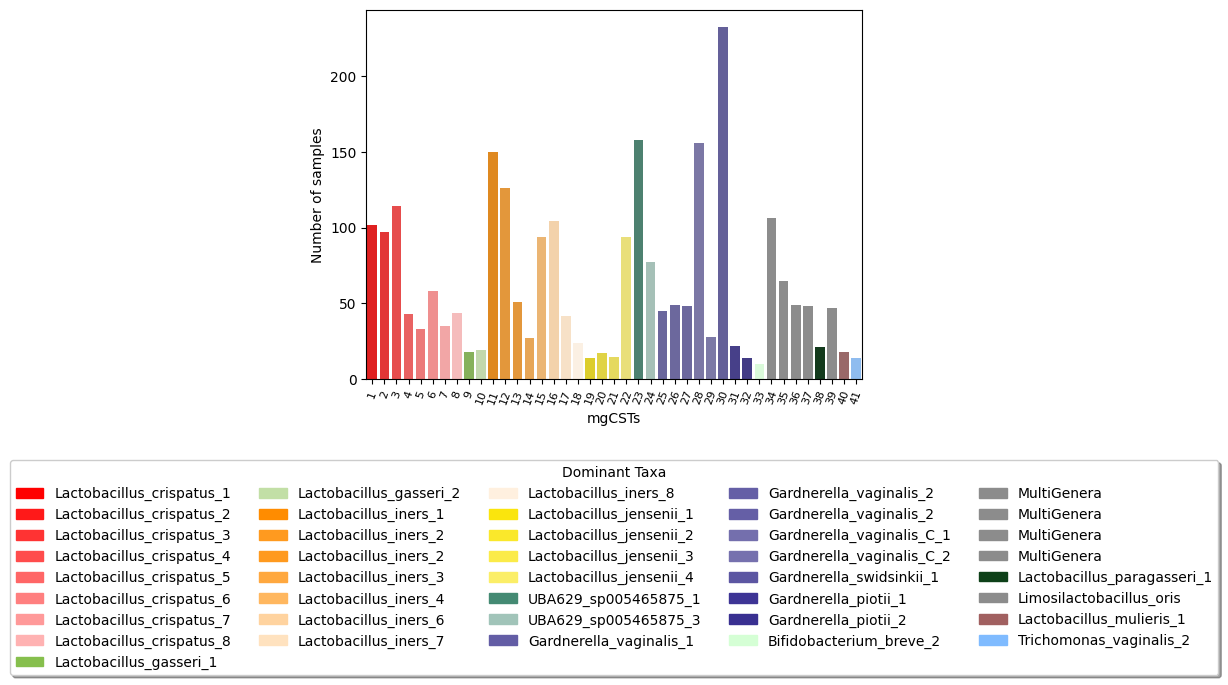

In [4]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

deepsplit = 4
mincluster = 10

data2 = pd.read_csv('Data/mgCST_sort_color.csv')
data2 = data2[(data2['deepSplit'] == deepsplit) & (data2['minClusterSize'] == mincluster)]
data2 = data2.reset_index(drop = True)

data = pd.read_csv('Data/mgCST_samples_color.csv')
data = data[(data['deepSplit'] == deepsplit) & (data['minClusterSize'] == mincluster)]
data = data.reset_index(drop = True)


count_sample = []
for element in data2['dtc'].values :
    count_sample.append(data.groupby(['dtc']).count()['sampleID'][element])
data2['count_sample'] = count_sample

mpatches.Patch(color = (1.0, 0.09803921568627451, 0.09803921568627451, 1.0), label = "test")
g = sns.barplot(x = 'mgCST', y = 'count_sample', data = data2 , legend = False, hue = 'mgCST', palette=list(data2['color_mgCST']))
fig1 = g.figure
plt.xlabel("mgCSTs")
plt.ylabel("Number of samples")
g.tick_params(axis='x', which='major', labelsize= 8, labelrotation=70)
# g.legend(title = 'mgCSTs',loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol = 5)
new_legend = data2['color_mgCST'].apply(lambda x : mcolors.to_rgba(x)).values

new_patch = []
for i,j in zip(new_legend, data2['domTaxa'].values) :
    new_patch.append(mpatches.Patch(color = i, label = j))

g.legend(handles=new_patch, title = 'Dominant Taxa',loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol = 5)
g.grid(False)

In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

path = "../Data/pca_model.pkl"
path2 = "/Users/amaros/Desktop/mgss2/log_norm.pkl"

with open(path, 'rb') as file:
        model = pickle.load(file)

with open(path2, 'rb') as file:
        log_norm = pickle.load(file)       

mgcsts_samples_df = pd.read_csv("../Data/mgCSTs.samples.df.csv")
mgCSTs_colors = pd.read_csv("../Data/mgCST_sort_color.csv")


In [10]:
minclustersize = 10
deepsplit = 4
df = mgcsts_samples_df[(mgcsts_samples_df['minClusterSize'] == minclustersize) & (mgcsts_samples_df['deepSplit'] == deepsplit)].reset_index(drop = True)
mgcst_sort_color = mgCSTs_colors[(mgCSTs_colors['minClusterSize'] == minclustersize) & (mgCSTs_colors['deepSplit'] == deepsplit)]

In [11]:
from sklearn.decomposition import PCA

data = log_norm[log_norm['sampleID'].isin(df['sampleID'])]
data = data.drop('sampleID', axis = 1)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(data)
explained_variance = pca.explained_variance_
components_compo = pca.components_

In [17]:
pca.components_[0]

array([-8.74416601e-03, -8.68400480e-03, -1.03141591e-02, ...,
        4.58891020e-06,  1.04598599e-05,  5.87094974e-06])

In [117]:
cols = log_norm.columns

In [116]:
import numpy as np

# Create a NumPy array
arr = components_compo[0]

# Get the indices of the three maximum values
n_largest = 5
max_indices = np.argpartition(-arr, n_largest)[:n_largest]
min_indices = np.argpartition(arr, n_largest)[:n_largest]
print("Indices of the 5 maximum values:", max_indices)
print("Indices of the 5 minimum values:", min_indices)

Indices of the 5 maximum values: [150294 150301 150287 150322 150337]
Indices of the 5 minimum values: [318  61 289  75  31]


In [120]:
arr[min_indices]

array([-0.01904946, -0.01912138, -0.0190168 , -0.01762397, -0.01748763])

In [125]:
arr[150294]

0.013123924879724042

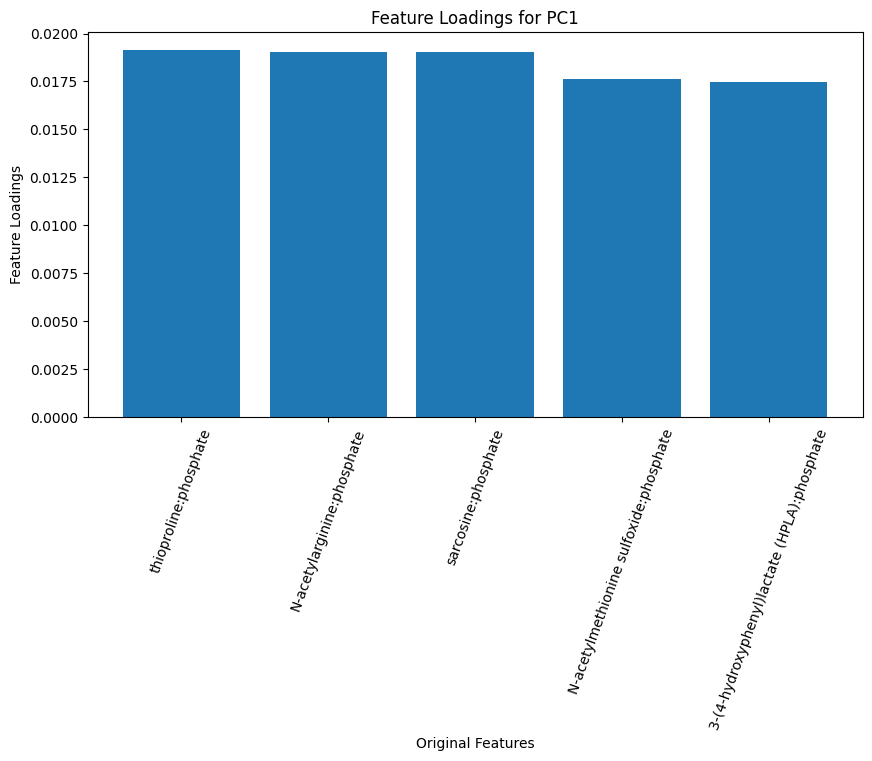

In [114]:
import numpy as np

# Create a NumPy array
arr = abs(components_compo[0])

# Get the indices of the three maximum values
n_largest = 5
max_indices = np.argpartition(-arr, n_largest)[:n_largest]

cols = log_norm.columns
labels = [cols[i] for i in max_indices]
compo = [abs(components_compo[0])[i] for i in max_indices]
pc1 = pd.DataFrame({'labels':labels, 'compo':compo}).sort_values(by='compo', ascending=False)

cols = log_norm.columns
def top_features(pc, n) :
    arr = abs(pca.components_[pc])
    n_largest = n
    max_indices = np.argpartition(-arr, n_largest)[:n_largest]
    pc_df = pd.DataFrame({'labels':[cols[i] for i in max_indices],
                          'explained_variance' : [abs(components_compo[0])[i] for i in max_indices]}).sort_values(by='explained_variance', ascending=False)
    return pc_df




plt.figure(figsize=(10, 5))
plt.bar(pc1['labels'], pc1['compo'])
plt.xlabel("Original Features")
plt.xticks(rotation=70)
plt.ylabel("Feature Loadings")
plt.title(f"Feature Loadings for PC1")
plt.show()

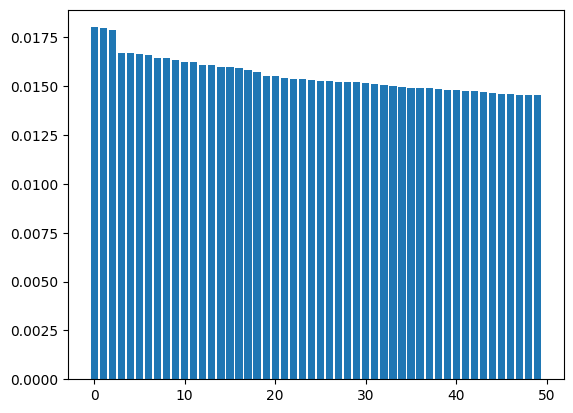

In [22]:
# Importance of features for PC1 - Top 50
import numpy as np

sorted_feature_indices = np.argsort(abs(compo_pc1))[::-1]

top = 50
top_indices = sorted_feature_indices[:top]

top_features = [abs(compo_pc1[i]) for i in top_indices]

plt.figure()
plt.bar(range(top), top_features)
plt.show()

[-0.01169177 -0.99194199  0.0141585  -0.03468832  0.12046018]


,Feature1,Feature2,Feature3,Feature4,Feature5
0,0.50,40.0,3.0,0.1,1.0
1,0.11,10.0,3.0,0.1,5.0
2,0.20,30.0,1.0,5.0,4.0


<BarContainer object of 5 artists>

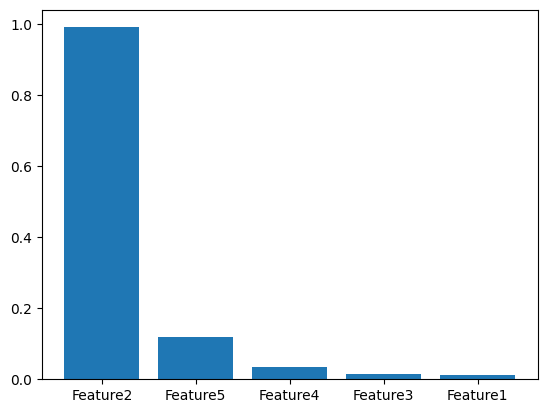

In [96]:
import numpy as np
from sklearn.decomposition import PCA

# Example data
X = np.array([[0.5, 40, 3, 0.1, 1],
              [0.11, 10, 3, 0.1, 5],
              [0.2, 30, 1, 5, 4]])

# Define the feature names
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']

df = pd.DataFrame(data = X, columns=feature_names)
# # Perform PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df)

print(pca.components_[0])
# Get the explained variance of each principal component

indices = []
for i in range(len(df.columns)) :
    index = df.columns[np.where(sorted(abs(pca.components_[0]),reverse=True)[i] == abs(pca.components_[0]))].values[0]
    indices.append(index)
display(df.head())
plt.bar(indices, sorted(abs(pca.components_[0]), reverse=True))


In [96]:
import pandas as pd

df = pd.read_csv("Data/mgCSTs.samples.df.csv")
df['order'] = df['domTaxa'].apply(lambda x: x.rsplit("_", 1)[1] if x.count("_") >= 2 and len(x.rsplit("_", 1)) == 2 else 0)

markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h','x']
markers_df = []
for i in df['order'] :
    markers_df.append(markers[int(i)])
df['markers'] = markers_df
df = df.drop('order', axis = 1)

# df.to_csv("Data/mgCSTs.samples.df.csv", index=False)

df

,dtc,sampleID,domTaxa,relabund,mgCST,minClusterSize,deepSplit,markers
0,1,323752_MG,Gardnerella_vaginalis_2,0.641446,14,10,0,D
1,1,343163_MG,Gardnerella_vaginalis_C_1,0.181759,14,10,0,s
2,1,343165_MG,UBA629_sp005465875_3,0.130286,14,10,0,^
3,1,342484_MG,Gardnerella_vaginalis_C_3,0.154450,14,10,0,^
4,1,323760_MG,Trichomonas_vaginalis_2,0.193813,14,10,0,D
...,...,...,...,...,...,...,...,...
518235,17,MG_20_30764_05,Lactobacillus_crispatus_6,0.964308,5,50,4,<
518236,17,MG_20_35904_05,Lactobacillus_crispatus_6,0.776529,5,50,4,<
518237,17,MG_20_48099_05,Lactobacillus_crispatus_6,0.940431,5,50,4,<
518238,17,MG_20_02860_05,Lactobacillus_crispatus_6,0.728809,5,50,4,<


In [3]:
import pandas as pd
File_S6 = pd.read_excel("../Data/File_S6_clean.xlsx")
mgcsts_samples_df = pd.read_csv("../Data/mgCSTs.samples.df.csv")
mgcsts_samples = mgcsts_samples_df[(mgcsts_samples_df['minClusterSize'] == 10) & (mgcsts_samples_df['deepSplit'] == 4)]
File_S6.head()

,UID,mapID,Source Study,BioProject,SID,Shannon,CST_Valencia,Age_cat,pH_cat,Nugent_cat,Race,mgCST,Coverage,Sym-Amsel-BV,Amsel-BV
0,ERR2238775,ERR2238775,Li et al.,PRJEB24147,ERR2238775,0.3349,III-A,NaN,NaN,NaN,Asian,12,243000,NaN,NaN
1,ERR2238777,ERR2238777,Li et al.,PRJEB24147,ERR2238777,0.2300,V,NaN,NaN,NaN,Asian,15,57700,NaN,NaN
2,ERR2244420,ERR2244420,Li et al.,PRJEB24147,ERR2244420,0.8791,IV-B,NaN,NaN,NaN,Asian,23,27600,NaN,NaN
3,ERR2244423,ERR2244423,Li et al.,PRJEB24147,ERR2244423,2.2721,IV-B,NaN,NaN,NaN,Asian,20,91900,NaN,NaN
4,ERR2244501,ERR2244501,Li et al.,PRJEB24147,ERR2244501,1.7009,IV-B,NaN,NaN,NaN,Asian,25,39900,NaN,NaN


In [92]:
new_id = mgcsts_samples['sampleID'].reset_index(drop=True)
old_id = File_S6['mapID'].reset_index(drop=True)

In [130]:
new_id[new_id.str.contains("1241")]

16    MG_341241
Name: sampleID, dtype: object

In [26]:
import numpy as np
IDs = pd.DataFrame({'new_id':new_id, "old_id":old_id})
IDs

,new_id,old_id
0,MG_194714,ERR2238775
1,343177_MG,ERR2238777
2,MG_0419RFLQV1,ERR2244420
3,MG_4006001189,ERR2244423
4,343255_MG,ERR2244501
...,...,...
2523,MG_226769,NaN
2524,MG_226787,NaN
2525,MG_226897,NaN
2526,NMH68,NaN


In [57]:
IDs[(IDs['old_id'].str.contains("323890_MG")==True)]

,new_id,old_id
48,342872_MG,323890_MG


In [71]:
a = IDs['old_id'].dropna().apply(lambda x : str(x).split("_MG")[0]).replace('', np.nan).dropna()
b = IDs['new_id'].dropna().apply(lambda x : str(x).split("_MG")[0]).replace('', np.nan).dropna()

In [69]:
b

1       343177_MG
4       343255_MG
8       342948_MG
20      342655_MG
29      342278_MG
          ...    
2510         NMH7
2518        NMH48
2521        PB003
2526        NMH68
2527        NMH83
Name: new_id, Length: 872, dtype: object

In [72]:
liste = []

for i in a.values :
    if i in b.values :
        liste.append(True)
    else :
        liste.append(False)

sum(liste)
# true_indices = [index for index, value in enumerate(liste) if value is True]
# a[true_indices]

755

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


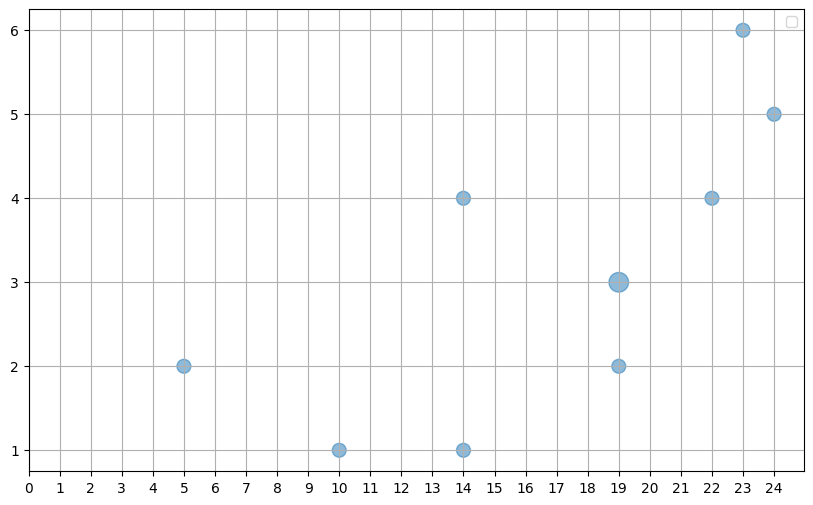

In [93]:
merged_df = old_mgCST.merge(new_mgCST, on='mapID', how='inner')

bubble_data = merged_df.groupby(['mgCST_x', 'mgCST_y']).size().reset_index(name='count')

import matplotlib.pyplot as plt
import numpy as np
# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(bubble_data['mgCST_x'], bubble_data['mgCST_y'], s=bubble_data['count'] * 100, alpha=0.5)
plt.grid(True)
plt.xticks(np.arange(0,25))
plt.legend()

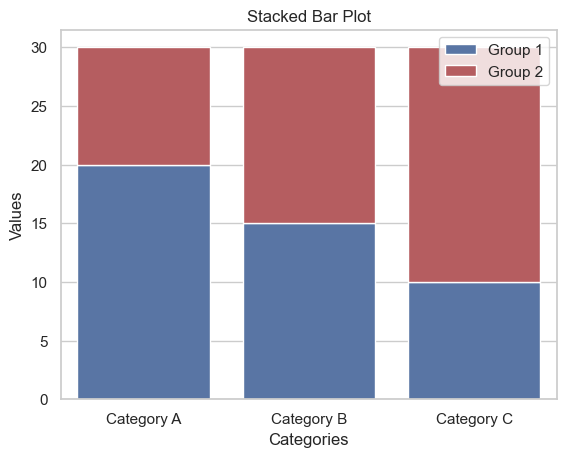

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data in a DataFrame
import pandas as pd

data = pd.DataFrame({
    'Categories': ['Category A', 'Category B', 'Category C'],
    'Group 1': [20, 15, 10],
    'Group 2': [10, 15, 20]
})

# Create a stacked bar plot using Seaborn
sns.set(style="whitegrid")
sns.barplot(x='Categories', y='Group 1', data=data, color='b', label='Group 1')
sns.barplot(x='Categories', y='Group 2', data=data, color='r', bottom=data['Group 1'], label='Group 2')

# Add labels and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Stacked Bar Plot')
plt.legend()

# Show the plot
plt.show()


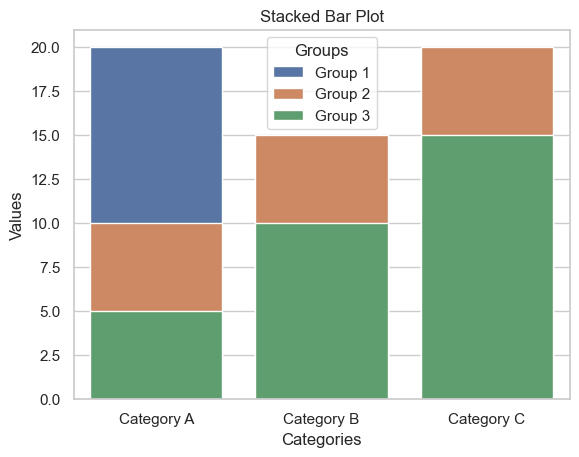

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data in a DataFrame
data = pd.DataFrame({
    'Categories': ['Category A', 'Category B', 'Category C'],
    'Group 1': [20, 15, 10],
    'Group 2': [10, 15, 20],
    'Group 3': [5, 10, 15]
})

# Get the list of column names (excluding the 'Categories' column)
column_names = data.columns[1:]

# Create a loop to stack multiple columns and create stacked bar plots
for column_name in column_names:
    sns.set(style="whitegrid")
    sns.barplot(x='Categories', y=column_name, data=data, label=column_name)
    
# Add labels and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Stacked Bar Plot')
plt.legend(title='Groups')

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data in a DataFrame
import pandas as pd

df3 = data.groupby(["Project","mgCST"]).size().reset_index().pivot(columns='Project', index = 'mgCST', values =0).fillna(0).reset_index()
proj_cols = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#d1ba36', '#a65628', '#f781bf', '#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e']
column_names = data.columns[1:]

# Create a stacked bar plot using Seaborn
sns.set(style="whitegrid")
for column_name in column_names:
    sns.set(style="whitegrid")
    sns.barplot(x='mgCST', y=column_name, data=df3, label=column_name)
plt.xlabel('mgCST')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()


In [158]:
df = pd.DataFrame({
    'Features' : ['potassium', 'calcium','fer', 'potassium', 'lactose','o2', 'sat', 'fer','o2'],
    'PCs' : ['PC1', 'PC1', 'PC1', 'PC2', 'PC2', 'PC2', 'PC3','PC3','PC3'],
    'Variance' : [25,20,15,12,10,8,5,4,2]
})

df

,Features,PCs,Variance
0,potassium,PC1,25
1,calcium,PC1,20
2,fer,PC1,15
3,potassium,PC2,12
4,lactose,PC2,10
5,o2,PC2,8
6,sat,PC3,5
7,fer,PC3,4
8,o2,PC3,2


In [1]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Your DataFrame
df = pd.DataFrame({
    'Features': ['potassium', 'calcium', 'fer', 'potassium', 'lactose', 'o2', 'sat', 'fer', 'o2'],
    'PCs': ['PC1', 'PC1', 'PC1', 'PC2', 'PC2', 'PC2', 'PC3', 'PC3', 'PC3'],
    'Variance': [25, 20, 15, 12, 10, 8, 5, 4, 2]
})

# Create subplots for each unique 'PCs' value
fig = make_subplots(rows=1, cols=3, subplot_titles=df['PCs'].unique())

for i, pc in enumerate(df['PCs'].unique(), start=1):
    data = df[df['PCs'] == pc]
    trace = go.Bar(x=data['Features'], y=data['Variance'], name=pc)
    fig.add_trace(trace, row=1, col=i)

# Update layout and display the figure
fig.update_layout(title_text="Variance by PC")
fig.update_xaxes(title_text="Features", row=1, col=2)
fig.update_yaxes(title_text="Variance", row=1, col=2)
fig.show()


In [12]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=[df['PCs'], df['Features'] ], 
    y=df['Variance'],
    name='Features',
))

# fig.add_trace(go.Bar(
#     x=[df['Features'],df['PCs'] ], 
#     y=df['Variance'],
#     name='Features',
# ))

fig.show()

In [13]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['PCs'],
    y=df['Variance'],
    text=df['Features'],
    name='Features'
))

fig.update_layout(
    title='Variance by PC',
    xaxis_title='PCs',
    yaxis_title='Variance'
)

fig.show()


In [14]:
import plotly.graph_objects as go

# Sample DataFrame
df = pd.DataFrame({
    'Features': ['potassium', 'calcium', 'fer', 'potassium', 'lactose', 'o2', 'sat', 'fer', 'o2'],
    'PCs': ['PC1', 'PC1', 'PC1', 'PC2', 'PC2', 'PC2', 'PC3', 'PC3', 'PC3'],
    'Variance': [25, 20, 15, 12, 10, 8, 5, 4, 2]
})

# Group the DataFrame by 'PCs' and 'Features' and calculate the sum of 'Variance'
grouped = df.groupby(['PCs', 'Features'])['Variance'].sum().unstack()

# Create a bar chart for each 'PCs' value
fig = go.Figure()

for pc in grouped.columns:
    fig.add_trace(go.Bar(x=grouped.index, y=grouped[pc], name=pc))

fig.update_layout(
    title='Variance by PC and Feature',
    xaxis_title='Features',
    yaxis_title='Variance',
    barmode='group'  # This groups the bars for each 'PCs' value
)

fig.show()


In [54]:
import plotly.graph_objects as go

# Sample DataFrame
df = pd.DataFrame({
    'Features': ['potassium', 'calcium', 'fer', 'potassium', 'lactose', 'o2', 'sat', 'fer', 'o2'],
    'PCs': ['PC1', 'PC1', 'PC1', 'PC2', 'PC2', 'PC2', 'PC3', 'PC3', 'PC3'],
    'Variance': [25, 20, 15, 12, 10, 8, 5, 4, 2]
})

# Define colors for each 'PC' category
pc_colors = {
    'PC1': 'red',
    'PC2': 'green',
    'PC3': 'blue'
}

fig = go.Figure()

for index, row in df.iterrows():
    fig.add_trace(go.Bar(
        x=[row['PCs']],
        y=[row['Variance']],
        text=[row['Features']],
        name=row['PCs'],
        # marker=dict(color=pc_colors[row['PCs']])  # Assign color based on 'PCs'
    ))

    fig.update_layout(
    title='Variance by PC and Feature',
    xaxis_title='PCs',
    yaxis_title='Variance',
    barmode='stack',
    # xaxis=dict(
    #     tickmode='array',
    #     tickvals=[0,0.5,1],
    #     ticktext=df['PCs'].unique(),
    #     tickangle=0,
    #     title_text='PCs',
    # ),
    # xaxis={'categoryorder':'category ascending'},
    bargap=0.1,  # Adjust this value to decrease the gap between bars in the same group
    bargroupgap=0.5,  # Adjust this value to decrease the gap between groups of bars
    xaxis_showgrid=False,  # Hide gridlines
    )

fig.show()


In [22]:
['PC1'] * 5 + ['PC2'] * 5 + ['PC3'] * 5

['PC1',
 'PC1',
 'PC1',
 'PC1',
 'PC1',
 'PC2',
 'PC2',
 'PC2',
 'PC2',
 'PC2',
 'PC3',
 'PC3',
 'PC3',
 'PC3',
 'PC3']

In [2]:
from sklearn.decomposition import PCA
import pandas as pd

# Create a sample dataset
data = {
    'Feature1': [1, 2, 3, 4],
    'Feature2': [4, 3, 2, 1],
    'Feature3': [5, 6, 7, 8]
}

df = pd.DataFrame(data)

# Initialize and fit a PCA model
pca = PCA(n_components=3)
pca.fit_transform(df)

# Get the variance of the three most important features for each PC
variance_of_important_features = []

for i in range(3):  # Get the top three PCs
    pc = pca.components_[i]
    variances = (pc ** 2)  # Square the weights to represent variance
    variance_of_important_features.append(variances)

# Sum the variances for each feature within each PC
total_variances = [variance.sum() for variance in variance_of_important_features]

# Print the total variances for the three most important features in each PC
for i, variance in enumerate(total_variances):
    print(f"Variance of the three most important features in PC{i + 1}: {variance:.4f}")


Variance of the three most important features in PC1: 1.0000
Variance of the three most important features in PC2: 1.0000
Variance of the three most important features in PC3: 1.0000


In [15]:
import plotly.graph_objects as go

# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 11, 12, 13, 14]

# Create a scatter plot with a black border around the markers
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(color='red', line=dict(color='black', width=1))
))

# Show the plot
fig.show()


In [11]:
import plotly.express as px

# Sample data
data = px.data.iris()

# Create a scatter plot with multiple columns in the legend
fig = px.scatter(data, x='sepal_width', y='sepal_length', color='species', facet_col='species')

# Customize the legend to display in 2 columns
fig.update_layout(legend=dict(orientation='h',
                              y=1, x=0,
                              xanchor='left', yanchor='top',
                              font=dict(size=12)),
                 legend_traceorder='normal')  # Corrected parameter

# Show the plot
fig.show()
